In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


## Load data in a dataframe

In [2]:
startups = pd.read_csv('50_Startups.csv')

## Check for null values

In [3]:
startups.isna().sum()

RnD               0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64

## Dataframe basic information

In [4]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startups.shape

(50, 5)

##    Understand the dataset and perform descriptive statistics(mean, standard deviation, etc..) 


In [118]:
std_dev = np.sqrt(((startups['RnD'] - startups['RnD'].mean())**2).sum()/(len(startups)-1))


45902.25648230753


In [6]:
startups.describe()

,RnD,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


✓   Check for missing data and perform cleaning if necessary.e.g  

In [7]:
startups.isna().sum()

RnD               0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64

✓   Use .info(), .isna() to check for missing or NaN data and remove those records from the dataframe. Use methods like replacing NaN values with mean/median of the column or estimate NaN values based on neighbouring data points. 


No missing vals present

✓    Explore relationships between pairs of features using scatter plots and pair plots. 


In [ ]:
def scatterPlot(df):
    for i in df.columns:
        for j in df.columns:
            if i == j: continue
            fig = px.scatter(df, x=i, y=j)
            fig.show()

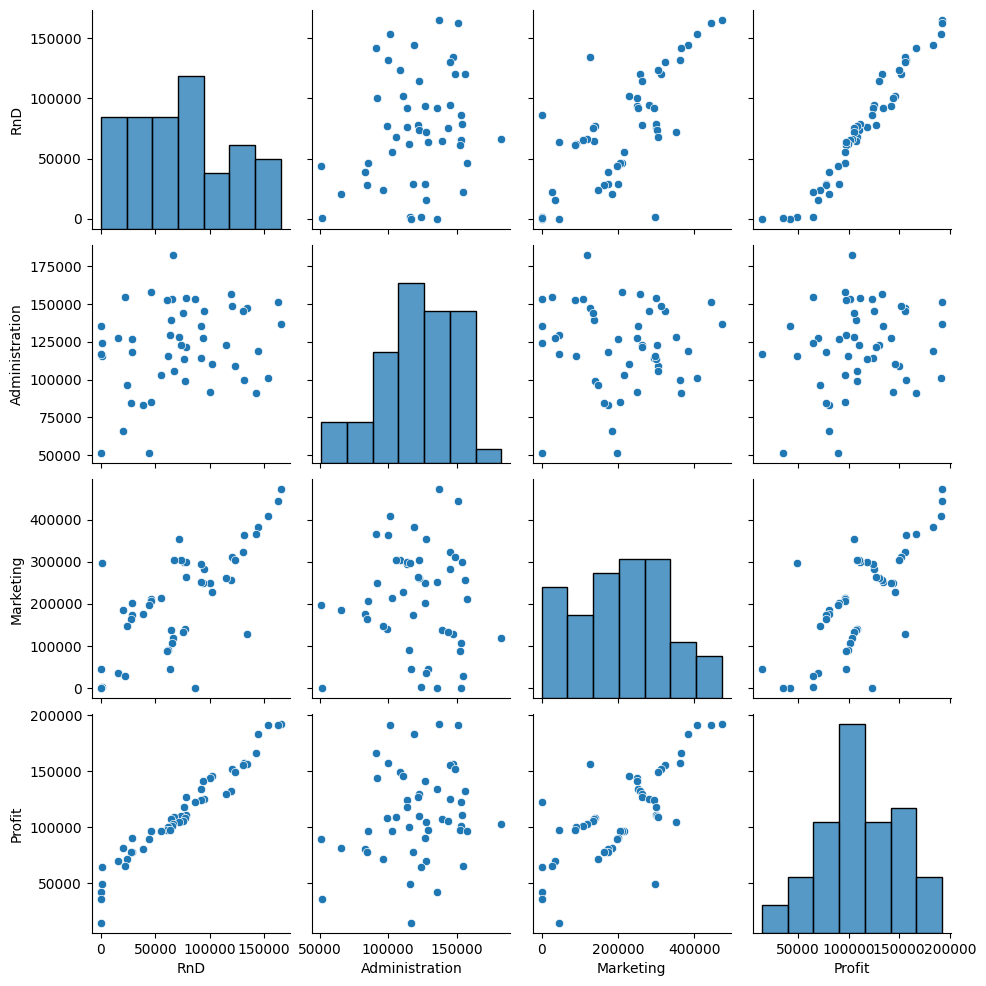

In [13]:
def pairPlot(df):
    fig = sns.pairplot(df)
    fig

pairPlot(startups)

✓    What are the different states where the startups are located? Provide a count of startups in each state. 


In [20]:
startups['RnD'].groupby(by=startups['State']).count()

State
California    17
Florida       16
New York      17
Name: RnD, dtype: int64

✓    Calculate the total and average profit generated by startups in each state. 


In [27]:
# Average Profit
startups['Profit'].groupby(by=startups['State']).mean()

State
California    103905.175294
Florida       118774.024375
New York      113756.446471
Name: Profit, dtype: float64

In [32]:
# Total Profit
startups['Profit'].groupby(by=startups['State']).sum()

State
California    1766387.98
Florida       1900384.39
New York      1933859.59
Name: Profit, dtype: float64

##    Visualize the distribution of profits among the startups using a histogram. 


In [158]:
print(px.colors.qualitative)

<module 'plotly.express.colors' from 'c:\\Users\\Chirantan_Degloorkar\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\plotly\\express\\colors\\__init__.py'>


In [167]:
fig = px.histogram(startups, x='Profit', facet_col='State',color='State',facet_col_wrap=3, title='Statewise Profit Distribution', nbins=15,)
fig.show()

✓    Compare the average R&D spend, administration spend, and marketing spend among the startups located in different states. 


In [44]:
startups.columns

Index(['RnD', 'Administration', 'Marketing', 'State', 'Profit'], dtype='object')

In [206]:
startups['TotalSpend'] = startups['Marketing'] + startups['Administration'] + startups['RnD']
startups

,RnD,Administration,Marketing,State,Profit,TotalSpend
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53
5,131876.90,99814.71,362861.36,New York,156991.12,594552.97
6,134615.46,147198.87,127716.82,California,156122.51,409531.15
7,130298.13,145530.06,323876.68,Florida,155752.60,599704.87
8,120542.52,148718.95,311613.29,New York,152211.77,580874.76
9,123334.88,108679.17,304981.62,California,149759.96,536995.67


In [239]:
data = startups.groupby('State').sum()
data

,RnD,Administration,Marketing,Profit,TotalSpend
State,,,,,
California,1099180.46,2052690.62,3103195.80,1766387.98,6255066.88
Florida,1291584.26,1948302.36,3957176.82,1900384.39,7197063.44
New York,1295316.06,2066239.00,3490882.27,1933859.59,6852437.33


In [237]:
startups.columns


State
California    6255066.88
Florida       7197063.44
New York      6852437.33
Name: TotalSpend, dtype: float64

In [250]:
px.pie(data, values='TotalSpend', names=['RnD', 'Marketing', 'Administration'], facet_col=data.index, hole=.4)

ValueError: Value of 'values' is not the name of a column in 'data_frame'. Expected one of ['RnD', 'Administration', 'Marketing', 'Profit', 'TotalSpend'] but received: <generator object DataFrame.iterrows at 0x000001F307ECAAC0>

In [213]:
fig = px.pie(startups, values='TotalSpend', names='Administration', color_discrete_sequence=px.colors.sequential.Blackbody, 
             title='Statewise Avg Spend',)
# colors = ['red', 'yellow', 'black']
# fig.update_traces(hoverinfo='percent', textinfo='percent+label', textfont_size=13,
#                   marker=dict(colors=colors,))
fig.show()

In [63]:
fig = px.histogram(startups, y=['Marketing', 'Administration', 'RnD'], x='State')
fig.show()
# startups['Administration'].groupby(by=startups['State']).mean()

c:\Users\Chirantan_Degloorkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



✓    Compute the correlation matrix between R&D spend, administration spend, marketing spend, and profit. 

In [72]:
startups.iloc[:,0:3].corr()

,RnD,Administration,Marketing
RnD,1.000000,0.241955,0.724248
Administration,0.241955,1.000000,-0.032154
Marketing,0.724248,-0.032154,1.000000


<Axes: >

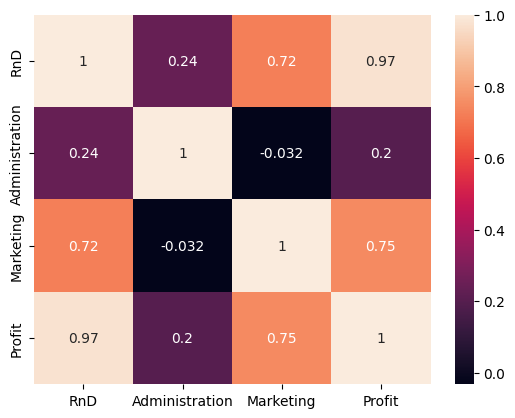

In [98]:
sns.heatmap(data=startups.drop(columns='State').corr(), annot=True)

✓    Determine which expenditure (R&D, administration, or marketing) has the highest correlation with profit. 


In [97]:
startups.drop(['State'], axis=1).corr()['Profit'][0:3]

RnD               0.972900
Administration    0.200717
Marketing         0.747766
Name: Profit, dtype: float64

In [263]:
df = data
for i in df.iterrows():
    df2 = i[1]
print(df2)    
# for index, row in df.iterrows():
#     state = row['State']
#     rnd = row['RnD']
#     administration = row['Administration']
#     marketing = row['Marketing']
#     total = row['Total']
    
#     labels = ['R&D', 'Administration', 'Marketing']
#     values = [rnd, administration, marketing]
    
#     fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
#     fig.update_layout(title=f'State: {state} - Spending Distribution', title_font_size=20)
#     fig.show()

RnD               1295316.06
Administration    2066239.00
Marketing         3490882.27
Profit            1933859.59
TotalSpend        6852437.33
Name: New York, dtype: float64


In [274]:
state = [i for i in startups['State'].unique()]
rnd = df['RnD']
administration = df['Administration'].groupby(by=df.index)
marketing = df['Marketing']
total = df['TotalSpend']

labels = ['RnD', 'Administration', 'Marketing']
values = [rnd, administration, marketing]

fig = px.pie(df, names=labels, values=values, title=f'State: {state} - Spending Distribution')
fig.show()

TypeError: Object of type SeriesGroupBy is not JSON serializable

In [279]:
data

,RnD,Administration,Marketing,Profit,TotalSpend
State,,,,,
California,1099180.46,2052690.62,3103195.80,1766387.98,6255066.88
Florida,1291584.26,1948302.36,3957176.82,1900384.39,7197063.44
New York,1295316.06,2066239.00,3490882.27,1933859.59,6852437.33


In [278]:
data_melted

,State,Category,Value
0,California,RnD,1099180.46
1,Florida,RnD,1291584.26
2,New York,RnD,1295316.06
3,California,Marketing,3103195.80
4,Florida,Marketing,3957176.82
5,New York,Marketing,3490882.27
6,California,Administration,2052690.62
7,Florida,Administration,1948302.36
8,New York,Administration,2066239.00


In [277]:
data_melted = data.reset_index().melt(id_vars='State', value_vars=['RnD', 'Marketing', 'Administration'], 
                                      var_name='Category', value_name='Value')

# Creating faceted pie chart
fig = px.pie(data_melted, values='Value', names='Category', facet_col='State', hole=0.4)

# Update layout
fig.update_layout(title='Spending Distribution by Category for Each State')

# Show the plot
fig.show()

c:\Users\Chirantan_Degloorkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

